# BA545 COMPETITION #1

## Advanced Preparation of Financial Data: 
By: Faris Alenzy, Andre Loukrezis & Elise Vincent

## Objective

Our client is seeking advanced and novel methods of predictive analysis of the “underpricing” phenomenon in companies that IPO (Initial Public Offering). We have been given a dataset by the client of over 600 IPO'd companies alongside performance metrics and information from their filed S-1 documents, and more specifically information from their MD&A (Management Discussion & Analysis) section.

With this data, we will create a machine learning model which uses the characteristics of each feature in the given data to try and predict future behaviour of companies after they IPO, and how efficiently it does this process.

Bellow is an outline of the pipeline we decided to use to find the most optimal result, along with stepy by step methodology and our final results.

## Pipeline

1. Descriptive Statistics
    - Finding descriptive statistics and features of the given dataset
    - Uncover insights which will help our preperation we must apply in 
      order to run our models 
 
 
2. Finding Missing Values
    - Further check the integrity of the data, uncover any missing data points 
      which we will need to later impute


3. Imputation
    - Appropriatly impute any missing datapoints for both continious and categorical
      features using the most appropriate methods


4. Binning
    - Based on our findings after imputation of any missing data points, further look
      at the behavior of each feature, and use that information to best bin features
      to run a more efficient model

5. Recoding
    - We applied further methods of imputation for our textual and sentiment based
      features and recoded in order to make ratios, which more approproately would
      fit for our model


6. Normalization
    - We applied the skew_autotransforms package's skew_autotransform function transform
      the skewness of of of the selected imputed features.


7. Outliers & Skew 
    - We take the dataset and determine the skew of each attribute. After doing so, we
      used the method of IQR (inter quartile range) to remove outliers from our data. 


8. Standardization
    -  We applied sklearn package's MinMax and StandardScaler functions to minimzing 
       the maximum error that could occur as well as the Z-Score of of the each attribute,
       which creates a scale of comparison for all features


9. Correlation
    - Find the correlation between the different attritubes to determine which features
      should or should not be put into the model. By finding attritubes with high correlation
      with one another, we know to not include two high correlation attributes in same model 
      because one will is a derivative of the other.
      

10. Feature Selection
    - After going through all cleaning processes, we then begin to test using different 


## Importing of Packages Used for Analysis and Model Creation

In [1]:
import pandas as pd
import numpy as np

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

#### the statement below ask matplotlib to use the 'ggplot' style
#### you should consider using that
plt.style.use('ggplot')

## Descriptive Statistics

Prior to any analysis or imputation, the original dataset ('Competition1_raw_data.xlsx') consisted of 682 rows and 21 attributes.
The final dataset- after imputation and used for feature selection- ('data_skew_imputed_outliers_fixed_min_max.csv') consisted of 660 rows and 69 attributes.

## Data Dictionary 

<table class="tg">
<tbody>
<tr>
<th class="tg-0pky">Variable</th>
<th class="tg-0pky">Variable Name</th>
<th class="tg-0pky">Variable Definition</th>
<th class="tg-fymr">Data Type</th>
</tr>
<tr>
<td class="tg-7btt" style="text-align: center;" colspan="4"><strong>PO Pricing &ndash; Used to derive Targets</strong></td>
</tr>
<tr>
<td class="tg-0pky"><strong>P(IPO)</strong></td>
<td class="tg-fymr">Offer Price</td>
<td class="tg-fymr">This is IPO final offering price (in dollars) stated in the 424B4 filings.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>P(H)</strong></td>
<td class="tg-fymr">Price Range Higher Bound</td>
<td class="tg-fymr">This is the higher bound (in dollars) of the filing price range stated in the S-1 filings.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>P(L)</strong></td>
<td class="tg-fymr">Price Range Lower Bound</td>
<td class="tg-fymr">This is the lower bound (in dollars) of the filing price range stated in the S-1 filings.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>P(1Day)</strong></td>
<td class="tg-fymr">First Day Trading Price</td>
<td class="tg-fymr">This is the first day trading (closing) price of the stock (in dollars).</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-7btt" style="text-align: center;" colspan="4"><strong>IPO Characteristics &ndash; Economic/Accounting/Financial Determinants of IPOs</strong></td>
</tr>
<tr>
<td class="tg-0pky"><strong>C1</strong></td>
<td class="tg-fymr">Days</td>
<td class="tg-fymr">Calendar days between the initial S-1 filing and the filing of Form 424B4 from EDGAR.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>C2</strong></td>
<td class="tg-fymr">Top-tier Dummy</td>
<td class="tg-fymr">Dummy variable, set to 1 if leading underwriter of IPO has a rating of 8 or higher, otherwise 0</td>
<td class="tg-0pky">Binary/Boolean</td>
</tr>
<tr>
<td class="tg-0pky"><strong>C3</strong></td>
<td class="tg-fymr">Earnings Per Share</td>
<td class="tg-fymr">Trailing Earnings Per Share (EPS) at the time of the IPO (in dollars)</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>C4</strong></td>
<td class="tg-fymr">Prior Nasdaq 15-dayReturns</td>
<td class="tg-fymr">The buy-and-hold returns of the CRSP Nasdaq value-weighted index on the 15-trading daysprior to the IPO day (t), ending on day t-1</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>C5</strong></td>
<td class="tg-fymr">Outstanding Shares</td>
<td class="tg-fymr">Defined as the number of outstanding common stock shares in the IPO</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>C6</strong></td>
<td class="tg-fymr">Offering Shares</td>
<td class="tg-fymr">Defined as the number of offering common stock shares in the IPO</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>C7</strong></td>
<td class="tg-fymr">Sales</td>
<td class="tg-fymr">Trailing annual firm sales (in millions of dollars) at the time of the IPO</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-7btt" style="text-align: center;" colspan="4"><strong>Textual Characteristics of IPO Prospectus MD&amp;A Sections</strong></td>
</tr>
<tr>
<td class="tg-0pky"><strong>T1</strong></td>
<td class="tg-fymr">Number of Sentences</td>
<td class="tg-fymr">Number of sentences in the MD&amp;A Sections</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>T2</strong></td>
<td class="tg-fymr">Number of Words</td>
<td class="tg-fymr">Number of words in the MD&amp;A Sections</td>
<td class="tg-fymr">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>T3</strong></td>
<td class="tg-fymr">Number of Real Words</td>
<td class="tg-fymr">Number of textual words in the MD&amp;A Sections</td>
<td class="tg-fymr">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>T4</strong></td>
<td class="tg-fymr">Number of Long Sentences</td>
<td class="tg-fymr">Number of sentences with more than 20 words in the MD&amp;A Sections</td>
<td class="tg-fymr">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>T5</strong></td>
<td class="tg-fymr">Number of Long Words</td>
<td class="tg-fymr">Number of words with more than 10 letters in the MD&amp;A Sections</td>
<td class="tg-fymr">Continuous/Float</td>
</tr>
<tr>
<td class="tg-7btt" style="text-align: center;" colspan="4"><strong>Sentiment Characteristics of IPO Prospectus MD&amp;A Sections:</strong></td>
</tr>
<tr>
<td class="tg-0pky"><strong>S1</strong></td>
<td class="tg-fymr">Number of Positive Words</td>
<td class="tg-fymr">Number of positive words in the MD&amp;A Sections, according to the L&amp;M dictionary</td>
<td class="tg-fymr">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>S2</strong></td>
<td class="tg-fymr">Number of Negative Words</td>
<td class="tg-fymr">Number of negative words in the MD&amp;A Sections, according to the L&amp;M dictionary</td>
<td class="tg-fymr">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>S3</strong></td>
<td class="tg-fymr">Number of Uncertain Words</td>
<td class="tg-fymr">Number of uncertain words in the MD&amp;A Sections, according to the L&amp;M dictionary</td>
<td class="tg-fymr">Continuous/Float</td>
</tr>
<tr>
<td class="tg-7btt" style="text-align: center;" colspan="4"><strong>Targets Variables Need Calculation</strong></td>
</tr>
<tr>
<td class="tg-0pky"><strong>Y1</strong></td>
<td class="tg-fymr">Pre-IPO Price Revision</td>
<td class="tg-fymr">Set to 1 if P(IPO) &lt; P(mid), where P(mid) = (P(H)+P(L))/2, otherwise 0</td>
<td class="tg-fymr">Binary/Boolean</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Y2</strong></td>
<td class="tg-fymr">Post-IPO Initial Return</td>
<td class="tg-fymr">Set to 1 if P(IPO) &lt; P(1Day), otherwise 0</td>
<td class="tg-fymr">Binary/Boolean</td>
</tr>
<tr>
<td class="tg-7btt" style="text-align: center;" colspan="4"><strong>Control Variables Need Calculation</strong></td>
</tr>
<tr>
<td class="tg-0pky"><strong>C3&rsquo;</strong></td>
<td class="tg-fymr">Positive EPS Dummy</td>
<td class="tg-fymr">Dummy variable set to 1 if C3 is positive at the time of the IPO, otherwise 0</td>
<td class="tg-fymr">Binary/Boolean</td>
</tr>
<tr>
<td class="tg-0pky"><strong>C5&rsquo;</strong></td>
<td class="tg-fymr">Share Overhang</td>
<td class="tg-fymr">C5&rsquo; = C5/C6</td>
<td class="tg-fymr">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>C6&rsquo;</strong></td>
<td class="tg-fymr">Up Revision</td>
<td class="tg-fymr">Set to (P(IPO) &ndash; P(mid))/P(mid) x 100%, if P(IPO) &gt; P(mid), otherwise 0</td>
<td class="tg-fymr">Continuous/Float</td>
</tr>
<tr>
<td class="tg-7btt" style="text-align: center;" colspan="4"><strong>IPO Identifiers</strong></td>
</tr>
<tr>
<td class="tg-0pky"><strong>I1</strong></td>
<td class="tg-fymr">Ticker</td>
<td class="tg-fymr">Ticker of the IPO</td>
<td class="tg-fymr">Text</td>
</tr>
<tr>
<td class="tg-0pky"><strong>I2</strong></td>
<td class="tg-fymr">Company Name</td>
<td class="tg-fymr">Name of the company offering the IPO</td>
<td class="tg-fymr">Text</td>
</tr>
<tr>
<td class="tg-0pky"><strong>I3</strong></td>
<td class="tg-fymr">Standard Industry Classifier</td>
<td class="tg-fymr">Standardized Industrial Classifier of the offering company</td>
<td class="tg-fymr">Text</td>
</tr>
</tbody>
</table>

In [2]:
# read and display original data 
# remove the '-' and replaces it with NaN
data = pd.read_excel('Competition1_raw_data.xlsx',na_values = "-",index_col = 'I1')
data.head(2)

,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
I1,,,,,,,,,,,,,,,,,,,,,
AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.87,122.0,1.0,3.43,0.029074,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.25,259.0,0.0,-1.62,-0.013352,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0


Using .describe, the mathmatical features of the dataset were obtained. Histograms were also created to see how each attribute was distributed. The vast majority of continuous variables in this set were skewed to the right.

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,677.000000,672.000000,672.000000,660.000000,660.000000,660.000000,646.000000,660.000000,6.760000e+02,6.760000e+02,610.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,0.859091,1.788904,0.007282,4.935776e+07,1.241519e+07,500.459962,465.634361,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178
std,6.053731,6.653429,5.835646,73.234948,152.817467,0.348192,162.666532,0.033318,1.043764e+08,2.512855e+07,1648.337634,175.741647,5449.644597,4839.670179,121.532637,472.914323,39.096525,84.828959,69.276285
min,3.000000,0.000000,3.000000,0.000000,10.000000,0.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,10.000000,12.500000,11.000000,11.000000,85.000000,1.000000,-0.852500,-0.013927,1.871417e+07,5.000000e+06,37.245750,351.000000,9195.000000,8162.000000,213.000000,462.000000,45.000000,73.000000,100.000000
50%,13.500000,15.000000,13.000000,14.845000,107.000000,1.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12045.000000,10785.000000,279.000000,624.000000,60.000000,100.000000,134.000000
75%,17.000000,17.000000,15.000000,20.485000,155.250000,1.000000,0.470000,0.031571,4.980786e+07,1.200000e+07,331.138000,551.000000,15241.000000,13760.000000,354.000000,795.000000,85.000000,142.000000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,1.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.000000,883.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa94906b860>,
      dtype=object)

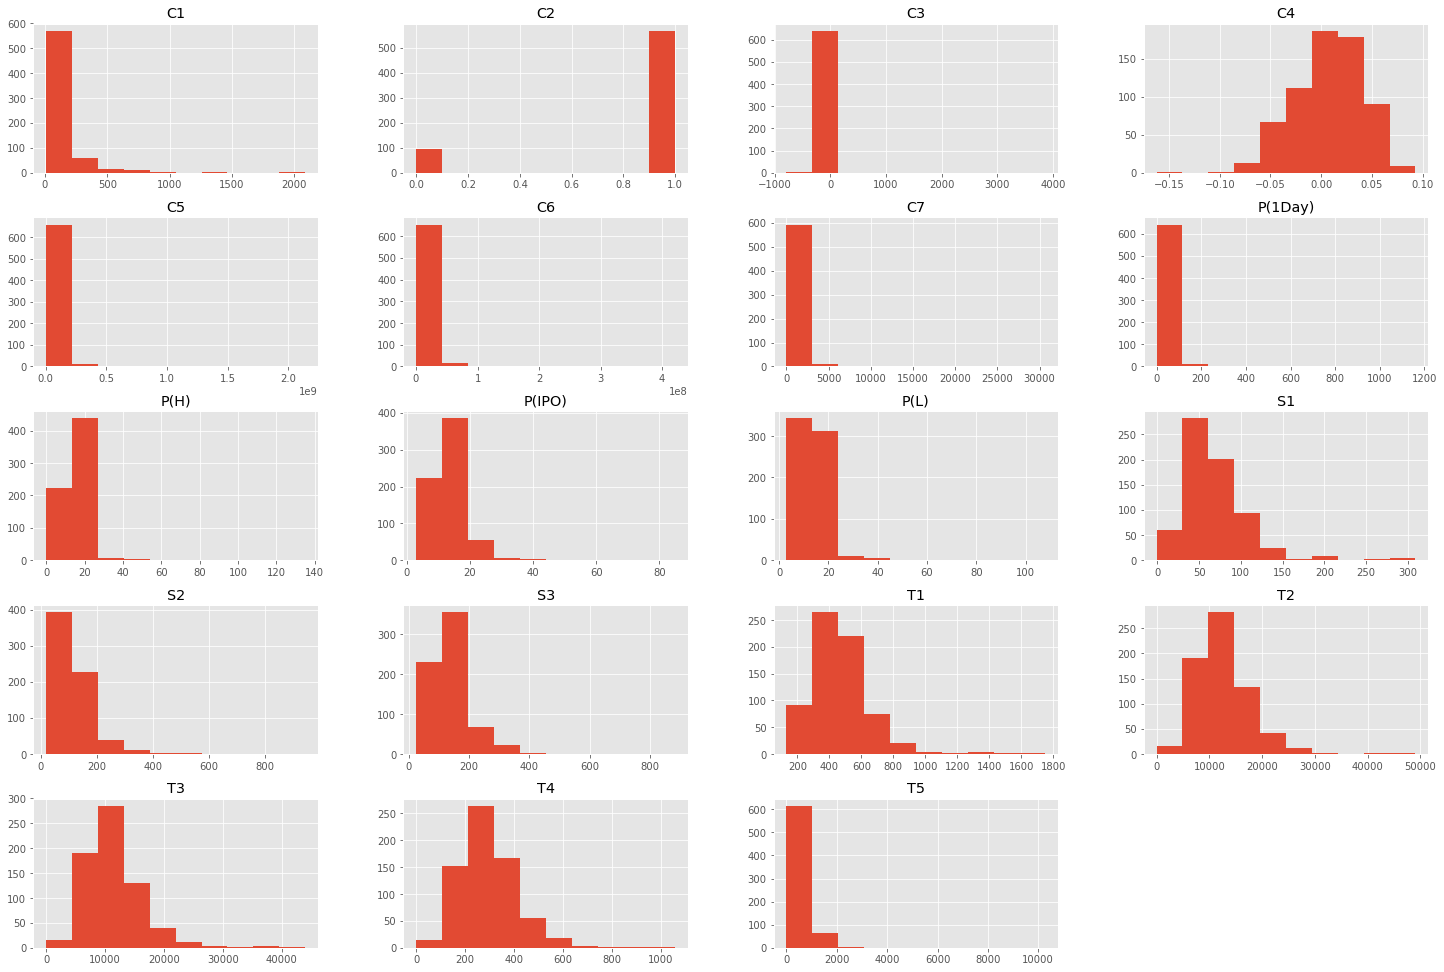

In [3]:
# descriptive features and histogram printout
display(data.describe())
display(data.hist( figsize = (25,17)))

## Finding Missing Values

We first applied a function which would create a table showing the number of missing values within each variable in the dataset. 

Overall, nearly every single column in our dataset was either missing data or had a non-numerical figure (-). These would all need to be replaced in order for us to run our feature selection and evaluation codes. The highest amount of all variables we had of missing data was roughly 10% of the Sales (C7) data. That was not significant enough for us to drop that variable, or any of the other variables with missing data. In order to account for those and maintain as much accuracy as possible prior to our steps of normalization or standardization, we decided to impute the missing data points within each variable. 


In [4]:
# source: https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe
# a function that provides a summary of the  missing values in a dataset

def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(df)

NameError: name 'df' is not defined

## Imputation of Categorical Features & Continuous Features

Once reviewing the missing data points, we handled each imputation variable by variable, applying what we determined to be the best method of imputation for each circumstance.

### Categorical Features 

For the missing Standard Industry Classifier codes (I3), we determined that this particular variable, being non continuous, couldn’t merely be imputed with an average or a median. Because of that, we felt we would research each individual missing company’s SIC code and impute the real codes into the data that we have been provided. That way we can have a more accurate dataset to be working with, and later have a better binning process. 

We used publicly available data provided from siccode.com, nasdaq.com and sec.gov  for the missing companies. In accordance to siccode, some companies may have had more than one SIC code, so we decided to use the primary code given from the SEC website, which we felt was a more accurate data source to be working off of. 

### Continuous Features

The majority of (zero, negative or missing) variables in the dataset were continuous. There are several ways they could have been imputed using a global constant (via mean, median, mode etc.) we decided to utilize the mean over the median. As the mean acts as the center of normally distributed data, we rationalized that it had a lower chance of affecting our data by means of any outliers.

## Taking a look at the Offer Price and Standard Industry Classifier Columns

For companies that had a missing offer price, we decided to index them with one another, and from that group, determine which ones had missing SIC codes.

For companies that had missing SIC codes, we determined that because this would be one of our most important features, that it was important to find the actual information for those individual companies rather than simply imputing the data or classifying them in some "unknown" category on their own. This would ensure we would get a more accurate test performed from our model if we could have the proper classifications.

We first tested to see how many would return no value. We then used the SIC and SEC websites to find each individual company's code, and umpute the value one by one prior to our binning process.

In [5]:
#seeing what missing in the col I3

data[data['I3'].isna()]['I3']

I1
ADKU    NaN
BLT     NaN
GSL     NaN
KFI     NaN
NAUH    NaN
RCH     NaN
TRMM    NaN
TZOO    NaN
Name: I3, dtype: object

In [6]:
data['I3_Imput'] = data['I3']
#we coudn't find the sic code on this website: https://cage.report/NCAGE/4TQ01
#but we found the naics code and then looked what it the corresponding sic code
# https://siccode.com/naics-code/623110/nursing-care-facilities-skilled-nursing-facilities

data['I3_Imput'].loc['ADKU'] = 8051
#https://siccode.com/business/blount-international-inc-1
data['I3_Imput'].loc['BLT'] = 3199
#https://www.nasdaq.com/market-activity/ipos/overview?dealId=622042-37804
#https://siccode.com/sic-code/4812/radiotelephone-communications
data['I3_Imput'].loc['GSL'] = 4412

#https://sec.report/Ticker/KFI
data['I3_Imput'].loc['KFI'] = 6199

#https://sec.report/Ticker/NAUH
data['I3_Imput'].loc['NAUH'] = 8200


#https://sec.report/Ticker/RCH
data['I3_Imput'].loc['RCH'] = 8711
#https://sec.report/Ticker/TRMM
data['I3_Imput'].loc['TRMM'] = 7200
#https://sec.report/Ticker/TZOO
data['I3_Imput'].loc['TZOO'] = 7373


# companies that have two or more sic code will be changed to the primary sic code taken from the sec website 
#https://sec.report/Ticker/DLB
data['I3_Imput'].loc['DLB']  = 6794
#https://sec.report/Ticker/DTSI
data['I3_Imput'].loc['DTSI']  = 6794

#https://sec.report/Ticker/RLD
data['I3_Imput'].loc['RLD']  = 3663
#https://sec.report/Ticker/UPG
data['I3_Imput'].loc['UPG']  = 5063

#https://sec.report/Ticker/EXLS
data['I3_Imput'].loc['EXLS']  = 7389

#https://sec.report/Ticker/g
data['I3_Imput'].loc['G']  = 8742


/opt/tljh/user/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


## Variable Encoding (Binning)
Within public market investing, it is very common to use a classification such as a sector, subsector, industry, subindustry, etc. to evaluate one company versus another. Companies have similarities and differences with many factors such as: how much revenue they earn (Sales), their profitability (Gross Profit, Earnings per Share), how dependent on debt they are (Debt-to-Equity Ratio), and even how big they are (Market Capitalization). But across different sectors, industries and sub-industries, what is the benchmark or standard for one in terms of more quantitative metrics may not be the case for other industries. A company in the Consumer Staples or Consumer Non-Durables sectors will tend to have a higher Price-to-Earnings Ratio relative to a Commercial Bank or an Insurance Company. Similarly, an Information Technology or Communication Services company will tend to have a higher Gross Profit Margin than that of an Automobile Manufacturer. 

Now all those metrics do not necessarily apply nor reside in this dataset that we are working with, however with that knowledge of how public markets tend to price companies that have certain similarities to one another, we felt it would be most appropriate to also use that same categorical methodology when we decided to bin our data. We believed that process is the best method to group the companies together, as we believe companies that are similar in type regarding their business model will also have similar factors such as their EPS, Sales, perhaps even the same underwriters or quality of underwriters, type of language within their section of Management Discussion & Analysis, etc. 

With that being the case, the following are the SIC Code classifications we determined to use for our binning process (found through the SIC and SEC websites).

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg" style="undefined;table-layout: fixed; width: 610px">
<colgroup>
<col style="width: 180px">
<col style="width: 430px">
</colgroup>
  <tr>
    <th class="tg-baqh">Range of SIC Codes</th>
    <th class="tg-baqh">Division</th>
  </tr>
  <tr>
    <td class="tg-0lax">0100-0999</td>
    <td class="tg-0lax">Agriculture, Forestry and Fishing</td>
  </tr>
  <tr>
    <td class="tg-0lax">1000-1499</td>
    <td class="tg-0lax">Mining</td>
  </tr>
  <tr>
    <td class="tg-0lax">1500-1799</td>
    <td class="tg-0lax">Construction</td>
  </tr>
  <tr>
    <td class="tg-0lax">1800-1999</td>
    <td class="tg-0lax">not used</td>
  </tr>
  <tr>
    <td class="tg-0lax">2000-3999</td>
    <td class="tg-0lax">Manufacturing</td>
  </tr>
  <tr>
    <td class="tg-0lax">4000-4999</td>
    <td class="tg-0lax">Transportation, Communications, Electric, Gas and Sanitary service</td>
  </tr>
  <tr>
    <td class="tg-0lax">5000-5199</td>
    <td class="tg-0lax">Wholesale Trade</td>
  </tr>
  <tr>
    <td class="tg-0lax">5200-5999</td>
    <td class="tg-0lax">Retail Trade</td>
  </tr>
  <tr>
    <td class="tg-0lax">6000-6799</td>
    <td class="tg-0lax">Finance, Insurance and Real Estate</td>
  </tr>
  <tr>
    <td class="tg-0lax">7000-8999</td>
    <td class="tg-0lax">Services</td>
  </tr>
  <tr>
    <td class="tg-0lax">9100-9729</td>
    <td class="tg-0lax">Public Administration</td>
  </tr>
  <tr>
    <td class="tg-0lax">9900-9999</td>
    <td class="tg-0lax">Nonclassifiable</td>
  </tr>
</table>

In [7]:
#bining the l3 col to divisions
def division_func(div) :
    #div = data['I3']
    if div <= 999:
        return 'Agriculture, Forestry and Fishing'
    elif div >= 1000 and div <= 1499:
        return 'Mining'
    elif div >= 1500 and div <= 1799:
        return 'Construction'
    elif div >= 2000 and div <= 3999:
        return 'Manufacturing'
    elif div >= 4000 and div <= 4999:
        return 'Transportation, Communications, Electric, Gas and Sanitary service'
    elif div >= 5000 and div <= 5199:
        return 'Wholesale Trade'
    elif div >= 5200 and div <= 5999:
        return 'Retail Trade'
    elif div >= 6000 and div <= 6799:
        return 'Finance, Insurance and Real Estate'
    elif div >= 7000 and div <= 8999:
        return 'Services'
    elif div >= 9100 and div <= 9729:
        return 'Public Administration'
    elif div >= 9900 and div <= 9999:
        return 'Nonclassifiable'
    


In [8]:
data['I3_Imput']= data['I3_Imput'].astype(int)
data['division'] = data['I3_Imput'].apply(division_func )
data['division'].value_counts()

Manufacturing                                                         309
Services                                                              208
Transportation, Communications, Electric, Gas and Sanitary service     60
Retail Trade                                                           48
Mining                                                                 31
Wholesale Trade                                                        14
Finance, Insurance and Real Estate                                      8
Agriculture, Forestry and Fishing                                       2
Construction                                                            2
Name: division, dtype: int64

In [9]:
data[data['division'].isna()]['division']

Series([], Name: division, dtype: object)

In [10]:
#encoding the divisions
def division_func_Manufacturing(div) :
    #div = data['I3']
    if div == 'Manufacturing':
        return 1
    else:
        return 0
def division_func_Services(div) :
    #div = data['I3']
    if div == 'Services':
        return 1
    else:
        return 0
    
def division_func_other(div) :
    #div = data['I3']
    if div == 'Agriculture, Forestry and Fishing':
        return 1
    elif div =='Mining':
        return 1
    elif div == 'Construction':
        return 1
    elif div =='Manufacturing':
        return 0
    elif div =='Transportation, Communications, Electric, Gas and Sanitary service':
        return 1
    elif div =='Wholesale Trade':
        return 1
    elif div =='Retail Trade':
        return 1
    elif div =='Finance, Insurance and Real Estate':
        return 1
    elif div =='Services':
        return 0
    elif div =='Public Administration':
        return 1
    elif div =='Nonclassifiable':
        return 1


In [11]:
data['div_manufacturing'] = data['division'].apply(division_func_Manufacturing )
div1= data['div_manufacturing'].value_counts().to_frame('count').reset_index().rename({'index' :'div_manufacturing'}, axis='columns'  )
  

data['div_other'] = data['division'].apply(division_func_other)
div2 = data['div_other'].value_counts().to_frame('count').reset_index().rename({'index' :'div_other'}, axis='columns'  )
       

data['div_services'] = data['division'].apply(division_func_Services )
div3 = data['div_services'].value_counts().to_frame('count').reset_index().rename({'index' :'div_services'}, axis='columns'  )
pd.concat([div1 , div2, div3] , axis =1)


,div_manufacturing,count,div_other,count,div_services,count
0,0,373,0,517,0,474
1,1,309,1,165,1,208


## Further Imputations

Once we finishing the binning process, we continued with further imputations for each textual and sentiment characteristic from the MD&A sections. This is necessary because we will be using ratios later on for our model of both these sections rather than the values themselves from each section. Any zero or negative values that may effect the ratio must be altered accordingly.

In [12]:
#checking the text cols if they have a zero or neg. number 
text_col = ['T1', 'T2', 'T3', 'T4', 'T5' , 'S1' , 'S2', 'S3']

for i  in text_col:
   
    name = data[i].name
    
    text_count_zero = data[i].where(data[i] == 0).count()
    text_count_neg = data[i].where(data[i] < 0).count()
    nan_count= data[i].isna().sum()
    
    print( "Zero values for col  " ,name," : ", text_count_zero,' and the Neg values : ', text_count_neg,' and the NaN values: '  , nan_count, 'Total missing', text_count_zero+text_count_neg + nan_count)
print("---------------------------------------------------------------------")
    

Zero values for col   T1  :  0  and the Neg values :  0  and the NaN values:  1 Total missing 1
Zero values for col   T2  :  2  and the Neg values :  0  and the NaN values:  1 Total missing 3
Zero values for col   T3  :  3  and the Neg values :  0  and the NaN values:  1 Total missing 4
Zero values for col   T4  :  2  and the Neg values :  0  and the NaN values:  1 Total missing 3
Zero values for col   T5  :  0  and the Neg values :  1  and the NaN values:  1 Total missing 2
Zero values for col   S1  :  0  and the Neg values :  1  and the NaN values:  1 Total missing 2
Zero values for col   S2  :  0  and the Neg values :  0  and the NaN values:  1 Total missing 1
Zero values for col   S3  :  0  and the Neg values :  0  and the NaN values:  1 Total missing 1
---------------------------------------------------------------------


In [13]:
#changing the missing and the zero and neg values
data['T1_Imput']= data['T1']
data['T1_Imput'] = data['T1_Imput'].fillna(data['T1_Imput'].mean())

data['T2_Imput']= data['T2']
data['T2_Imput'] = data['T2_Imput'].fillna(data['T2_Imput'].mean())

data['T3_Imput']= data['T3']
data['T3_Imput'] = data['T3_Imput'].fillna(data['T3_Imput'].mean())

data['T4_Imput']= data['T4']
data['T4_Imput'] = data['T4_Imput'].fillna(data['T4_Imput'].mean())

data['T5_Imput']= data['T5']
data['T5_Imput'] = data['T5_Imput'].fillna(data['T5_Imput'].mean())

data['S1_Imput']= data['S1']
data['S1_Imput'] = data['S1_Imput'].fillna(data['S1_Imput'].mean())

data['S2_Imput']= data['S2']
data['S2_Imput'] = data['S2_Imput'].fillna(data['S2_Imput'].mean())

data['S3_Imput']= data['S3']
data['S3_Imput'] = data['S3_Imput'].fillna(data['S3_Imput'].mean())

data['T1_Imput'] = data['T1_Imput'] = np.where(data['T1_Imput'] <=0, data['T1_Imput'].mean(), data['T1_Imput'])
data['T2_Imput'] = data['T2_Imput'] = np.where(data['T2_Imput'] <=0, data['T2_Imput'].mean(), data['T2_Imput'])
data['T3_Imput'] = data['T3_Imput'] = np.where(data['T3_Imput'] <=0, data['T3_Imput'].mean(), data['T3_Imput'])
data['T4_Imput'] = data['T4_Imput'] = np.where(data['T4_Imput'] <=0, data['T4_Imput'].mean(), data['T4_Imput'])
data['T5_Imput'] = data['T5_Imput'] = np.where(data['T5_Imput'] ==-1, data['T5_Imput'].mean(), data['T5_Imput'])
data['S1_Imput'] = data['S1_Imput'] = np.where(data['S1_Imput'] ==-1, data['S1_Imput'].mean(), data['S1_Imput'])

In [14]:
text_col = ['T1_Imput', 'T2_Imput', 'T3_Imput', 'T4_Imput', 'T5_Imput' , 'S1_Imput' , 'S2_Imput', 'S3_Imput']

for i  in text_col:
   
    name = data[i].name
    
    text_count_zero = data[i].where(data[i] == 0).count()
    text_count_neg = data[i].where(data[i] < 0).count()
    nan_count= data[i].isna().sum()
    
    print( "Zero values for col  " ,name," : ", text_count_zero,' and the Neg values : ', text_count_neg,' and the NaN values: '  , nan_count, 'Total missing', text_count_zero+text_count_neg + nan_count)
print("---------------------------------------------------------------------")

Zero values for col   T1_Imput  :  0  and the Neg values :  0  and the NaN values:  0 Total missing 0
Zero values for col   T2_Imput  :  0  and the Neg values :  0  and the NaN values:  0 Total missing 0
Zero values for col   T3_Imput  :  0  and the Neg values :  0  and the NaN values:  0 Total missing 0
Zero values for col   T4_Imput  :  0  and the Neg values :  0  and the NaN values:  0 Total missing 0
Zero values for col   T5_Imput  :  0  and the Neg values :  0  and the NaN values:  0 Total missing 0
Zero values for col   S1_Imput  :  0  and the Neg values :  0  and the NaN values:  0 Total missing 0
Zero values for col   S2_Imput  :  0  and the Neg values :  0  and the NaN values:  0 Total missing 0
Zero values for col   S3_Imput  :  0  and the Neg values :  0  and the NaN values:  0 Total missing 0
---------------------------------------------------------------------


## Recoding: Creating Text Ratios

|Variable| Calculation |Description |
|---|:---|---|
|T4 Imput Ratio|# of Long Sentences / # of Sentences | % of long sentences that make up all sentences within the MD&A|
|T3 Imput Ratio|# of Real Words / # of Words | % of real words that make up all words within the MD&A|
|T5 Imput Ratio|# of Long Words / # of Words | % of long words that make up all words within the MD&A|
|S1 Imput Ratio|# of Positive Words / # of Words | % of long words that make up all words within the MD&A|
|S2 Imput Ratio| # of Negative Words / # of Words | % of negative words that make up all words within the MD&A|
|S3 Imput Ratio|# of Uncertain Words / # of Words | % of uncertain words that make up all words within the MD&A|


We created ratios to be used in our model rather than using the actual features themselves because a ratio better portays the given data in relative terms. Using simple counts can create a very large range for documents that have longer MD&A sections than others, some that use more superfluous wording throughout each section, and perhaps some are in different business segments such as pharmacueticals and biotechnology which would use higher level veribiage regarding any drugs or treatments in development with their scientific names, rather than a company with a simpler business model, such as eatery, retail store, bank, etc. 

In [15]:
# Creating our imputed values for textual and sentiment based characteristics

data['T4_Imput_ratio']=data['T4_Imput']/data['T1_Imput']

data['T3_Imput_ratio']=data['T3_Imput']/data['T2_Imput']

data['T5_Imput_ratio']=data['T5_Imput']/data['T2_Imput']

data['S1_Imput_ratio']=data['S1_Imput']/data['T2_Imput']

data['S2_Imput_ratio']=data['S2_Imput']/data['T2_Imput']

data['S3_Imput_ratio']=data['S3_Imput']/data['T2_Imput']
# Test to see if the imputation worked.
data['T3_Imput_ratio'].isna().sum()

0

# Calculations

Split the data into testing and training data (via provided evaluation code). We then fit the model for oversampled data, followed by performing the cross validation and then calculating the F1-Score and AUC.


## Targets Variables Calculation
Y1 Pre-IPO Price Revision Set to 1 if P(IPO) &lt; P(mid), where P(mid) = (P(H)+P(L))/2, otherwise 0 Binary/Boolean
Y2 Post-IPO Initial Return Set to 1 if P(IPO) &lt; P(1Day), otherwise 0 Binary/Boolean

In [16]:
data['P(1Day)_Imput'] = data['P(1Day)']
data.dropna(subset =['P(1Day)_Imput'],inplace = True)

data['P(H)_Imput'] = data['P(H)']
data['P(H)_Imput'] = data['P(H)'].fillna(data['P(H)_Imput'].mean())
data['P(L)_Imput'] = data['P(L)']
data['P(L)_Imput'] = data['P(L)'].fillna(data['P(L)_Imput'].mean())

data['P(IPO)_Imput'] = data['P(IPO)']
data['P(IPO)_Imput'] = data['P(IPO)_Imput'].fillna(data['P(IPO)_Imput'].mean())



data['P(mid)'] = (data['P(H)_Imput']+data['P(L)_Imput'])/2
data['Y1'] = data.apply(lambda x:  1 if  x['P(IPO)_Imput'] < x['P(mid)'] else 0  , axis=1) 
data['Y2'] = data.apply(lambda x:  1 if  x['P(IPO)_Imput'] < x['P(1Day)_Imput'] else 0  , axis=1) 
data.head(2)

,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,...,S1_Imput_ratio,S2_Imput_ratio,S3_Imput_ratio,P(1Day)_Imput,P(H)_Imput,P(L)_Imput,P(IPO)_Imput,P(mid),Y1,Y2
I1,,,,,,,,,,,,,,,,,,,,,
AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.87,122.0,1.0,3.43,0.029074,...,0.004875,0.009199,0.010929,11.87,9.5,8.5,10.0,9.0,0,1
ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.25,259.0,0.0,-1.62,-0.013352,...,0.003258,0.011105,0.010876,7.25,10.0,8.0,8.0,9.0,1,0


## Normalization


We applied the skew_autotransforms package's skew_autotransform function to transform
the skewness of the selected imputed features, also allowing us to see how much the function skewed the data post tranformation.


 ------------------------------------------------------

 'T4_Imput_ratio_skew' had 'negative' skewness of -0.08

 Transformation yielded skewness of -0.00


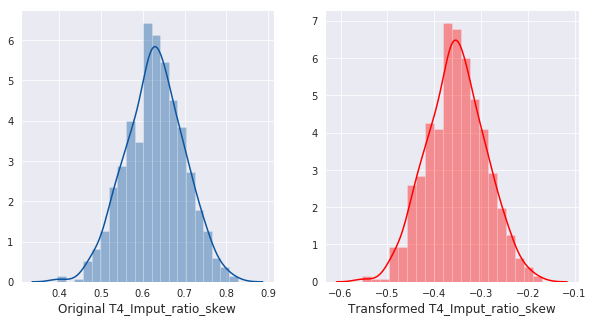


 ------------------------------------------------------

 'T3_Imput_ratio_skew' had 'positive' skewness of 8.18

 Transformation yielded skewness of -0.88


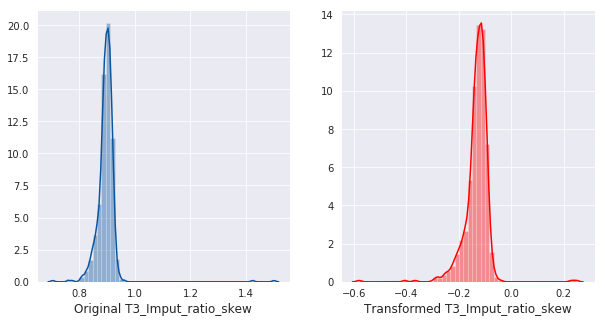


 ------------------------------------------------------

 'T5_Imput_ratio_skew' had 'positive' skewness of 0.44

 Transformation yielded skewness of 0.02


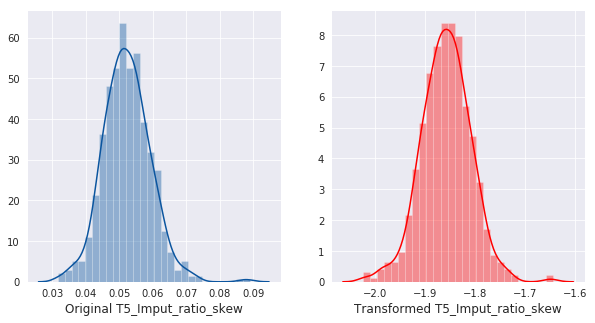


 ------------------------------------------------------

 'S1_Imput_ratio_skew' had 'positive' skewness of 0.93

 Transformation yielded skewness of 0.00


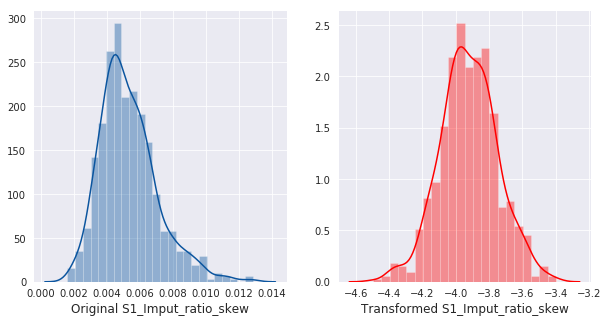


 ------------------------------------------------------

 'S2_Imput_ratio_skew' had 'positive' skewness of 1.19

 Transformation yielded skewness of -0.00


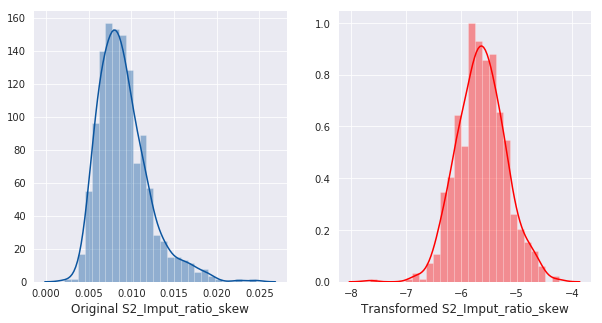


 ------------------------------------------------------

 'S3_Imput_ratio_skew' had 'positive' skewness of 1.39

 Transformation yielded skewness of -0.01


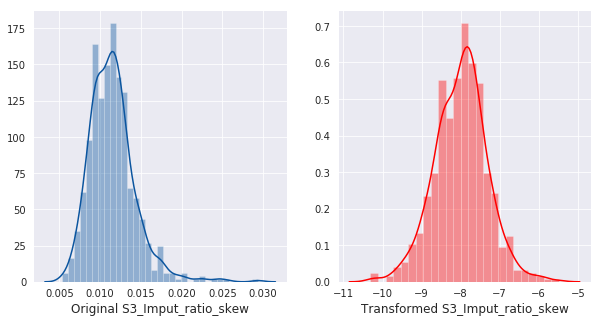


 ------------------------------------------------------

 'C5_skew' had 'positive' skewness of 13.46

 Transformation yielded skewness of -0.04


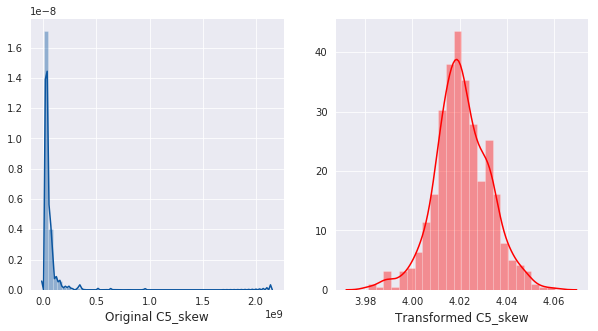

Original average skewness value was 4.14
Average skewness after transformation is 4.14


In [17]:
# creating the skew cols

skew_cols = ['T4_Imput_ratio',
'T3_Imput_ratio' ,
'T5_Imput_ratio' ,
'S1_Imput_ratio',
'S2_Imput_ratio',
'S3_Imput_ratio',
'C5', 'C3' ]

 
for i  in skew_cols:

    data[i+'_skew'] = data[i]

#data.columns[67:]

#https://github.com/datamadness/Automatic-skewness-transformation-for-Pandas-DataFrame
from skew_autotransform import skew_autotransform

cols_to_skew = ['T4_Imput_ratio_skew',
       'T3_Imput_ratio_skew', 'T5_Imput_ratio_skew', 'S1_Imput_ratio_skew',
       'S2_Imput_ratio_skew', 'S3_Imput_ratio_skew', 'C5_skew']
data = skew_autotransform(data,include = cols_to_skew, plot = True, exp = False, threshold = 0.01)

print('Original average skewness value was %2.2f' %(np.mean(abs(data.skew()))))
print('Average skewness after transformation is %2.2f' %(np.mean(abs(data.skew()))))

**We still needed to apply other techniques to try and reduce the skewness namely columns: C3 ,C6, C7**

In [19]:
cube_col = [  'C3'  ]

for i  in cube_col:
    
    data[i+'_cube_root'] = np.cbrt(data[i])

log_col = [   'C7' ]

for i  in log_col:
    
    data[i+'_log'] = np.log(data[i])
    
log_col = [  'C6']

for i  in log_col:
    
    data[i+'_log'] = np.log(1/data[i])


## Control Variables Calculation

C3’ Positive EPS Dummy Dummy variable set to 1 if C3 is positive at the time of the IPO, otherwise 0  <br>
C5’ Share Overhang C5’ = C5/C6  <br>
C6’ Up Revision Set to (P(IPO) – P(mid))/P(mid) x 100%, if P(IPO) > P(mid), otherwise 0

In [20]:
data['C1_Imput'] = data['C1']
data['C1_Imput'] = data['C1_Imput'].fillna(data['C1_Imput'].mean())
#C2 is Binary we use mode
data['C2_Imput'] = data['C2']
data['C2_Imput'] = data['C2_Imput'].fillna(data['C2_Imput'].mode()[0])
data['C3_cube_root_Imput'] = data['C3_cube_root']
data['C3_cube_root_Imput'] = data['C3_cube_root_Imput'].fillna(data['C3_cube_root_Imput'].mean())
data['C4_Imput'] = data['C4']
data['C4_Imput'] = data['C4_Imput'].fillna(data['C4_Imput'].mean())
data['C5_log_Imput'] = data['C5_skew']
data['C5_log_Imput'] = data['C5_log_Imput'].fillna(data['C5_log_Imput'].mean())
data['C6_log_Imput'] = data['C6_log']
data['C6_log_Imput'] = data['C6_log_Imput'].fillna(data['C6_log_Imput'].mean())
data['C7_log_Imput'] = data['C7_log']
data['C7_log_Imput'] = data['C7_log_Imput'].fillna(data['C7_log_Imput'].mean())

In [21]:
data['C3_cube_root_Imput_p'] = data.apply(lambda x:  1 if  x['C3_cube_root_Imput'] > 0 else 0  , axis=1) 
data['C5_log_Imput_p'] = data['C5_log_Imput']/data['C6_log_Imput']
data['C6_log_Imput_p'] = data.apply(lambda x:  ((x['P(IPO)_Imput'] - x['P(mid)']) / x['P(mid)']) * 100 if  x['P(IPO)_Imput'] > x['P(mid)'] else 0  , axis=1)

In [26]:
data.skew()[44:]

T4_Imput_ratio_skew     -0.003431
T3_Imput_ratio_skew     -0.876952
T5_Imput_ratio_skew      0.015519
S1_Imput_ratio_skew      0.003051
S2_Imput_ratio_skew     -0.003602
S3_Imput_ratio_skew     -0.013523
C5_skew                 -0.038459
C3_skew                 21.330344
C3_cube_root             0.441362
C7_log                  -0.611257
C6_log                  -0.889634
C1_Imput                 5.649485
C2_Imput                -2.068874
C3_cube_root_Imput       0.449573
C4_Imput                -0.477892
C5_log_Imput            -0.038459
C6_log_Imput            -0.889634
C7_log_Imput            -0.640945
C3_cube_root_Imput_p     0.091211
C5_log_Imput_p           0.388192
C6_log_Imput_p           4.372685
dtype: float64

## Outliers & Skew: Interquartile Range

We first look for skews in the data. We will assign each attribute by their level of skewness into different lists, which then will be be used in a function determing IQR (inter quartile range) to removing  outliers from our data. By eliminating these outliers, we are left with better fit data that does not run the chance of creating any bias in our assumptions or results.


In [27]:
def find_outliers(x):
    
    if x > upper_bound: 
        x = q3
    elif x < lower_bound: 
        x = q1
    else:
        pass
        
    return x

In [28]:
outliers_col = ['C1_Imput' ,'C5_log_Imput_p', 'C6_log_Imput_p', 
                'C7_log_Imput',  'T3_Imput_ratio_skew', 'T4_Imput_ratio_skew',
                'T5_Imput_ratio_skew', 'S1_Imput_ratio_skew', 'S2_Imput_ratio_skew',
       'S3_Imput_ratio_skew'  ]

for i  in outliers_col:
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)

    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
    data[i+'_outliner_fix'] = data[i].apply(lambda x: find_outliers(x))

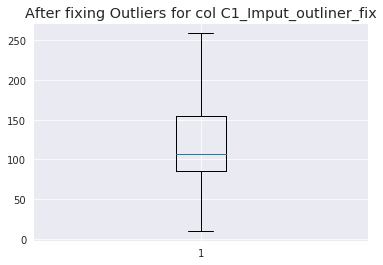

None

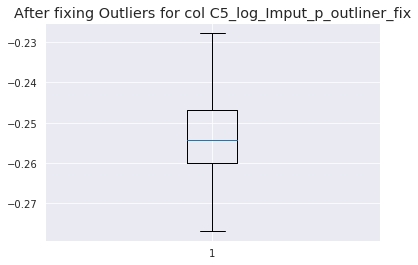

None

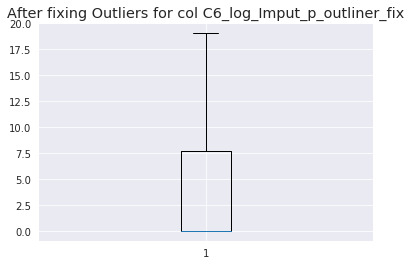

None

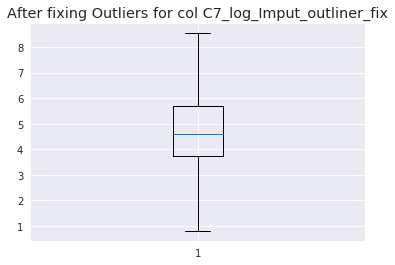

None

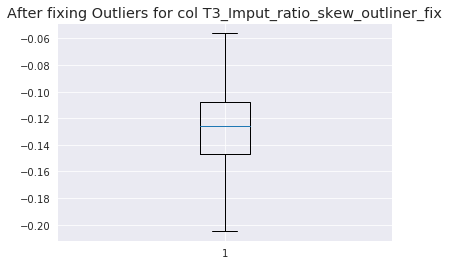

None

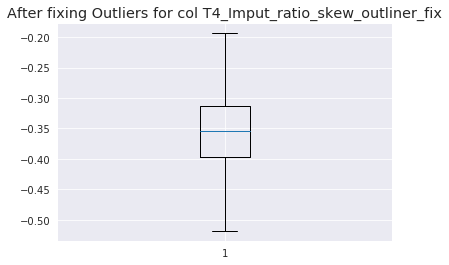

None

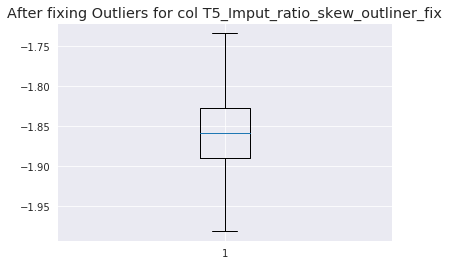

None

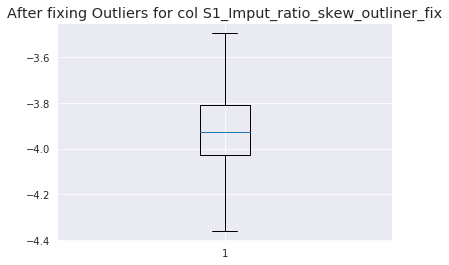

None

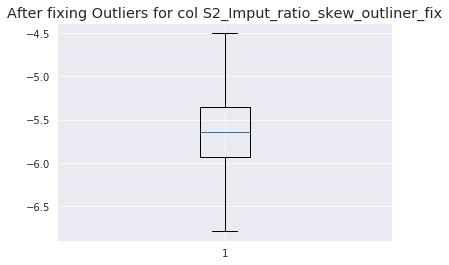

None

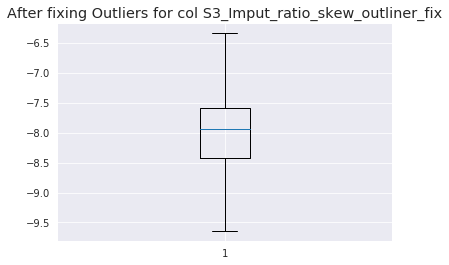

None

In [29]:
outliers_col = ['C1_Imput_outliner_fix' ,'C5_log_Imput_p_outliner_fix',
                'C6_log_Imput_p_outliner_fix', 'C7_log_Imput_outliner_fix', 
                'T3_Imput_ratio_skew_outliner_fix', 'T4_Imput_ratio_skew_outliner_fix',
                'T5_Imput_ratio_skew_outliner_fix', 'S1_Imput_ratio_skew_outliner_fix',
                'S2_Imput_ratio_skew_outliner_fix',
       'S3_Imput_ratio_skew_outliner_fix'  ]

for i in outliers_col :
    plt.boxplot(data[i])
    plt.title("After fixing Outliers for col "+data[i].name )
    display(plt.show())

In [35]:
# Test of skewness post transformation

abs(data.skew()[65:]) >0.5

C1_Imput_outliner_fix               False
C5_log_Imput_p_outliner_fix         False
C6_log_Imput_p_outliner_fix          True
C7_log_Imput_outliner_fix           False
T3_Imput_ratio_skew_outliner_fix    False
T4_Imput_ratio_skew_outliner_fix    False
T5_Imput_ratio_skew_outliner_fix    False
S1_Imput_ratio_skew_outliner_fix    False
S2_Imput_ratio_skew_outliner_fix    False
S3_Imput_ratio_skew_outliner_fix    False
dtype: bool

## Standardization 
- Min-Max Method
    - We applied the sklearn package's MinMax function to minimzing the maximum
      error that could occur.


- Z-score Method
    - We applied the sklearn package's StandardScaler to find the Z-Score of
      of the each attribute. In doing so, this method creates a benchmark scale
      which each attribute can be compared.
      
    
In our selected pipeleine, we chose to use the Min-Max method over the Z-Score method because it gave us the best results when tested. We used a trial and error method to determine which gave us the highest performance. 


In [36]:
#https://stackoverflow.com/questions/35723472/how-to-use-sklearn-fit-transform-with-pandas-and-return-dataframe-instead-of-num
from sklearn.preprocessing import MinMaxScaler
min_max_col = ['C1_Imput_outliner_fix' ,'C3_cube_root_Imput_p','C4_Imput','C5_log_Imput_p_outliner_fix', 'C6_log_Imput_p_outliner_fix',
               'C7_log_Imput_outliner_fix',  'T3_Imput_ratio_skew_outliner_fix', 
               'T4_Imput_ratio_skew_outliner_fix','T5_Imput_ratio_skew_outliner_fix',
               'S1_Imput_ratio_skew_outliner_fix', 'S2_Imput_ratio_skew_outliner_fix',
       'S3_Imput_ratio_skew_outliner_fix',  ]

for i  in min_max_col:
    data[i+'_min_max'] =MinMaxScaler().fit_transform(data[i].values.reshape(-1, 1))

In [44]:
# final Test of skewness post Standardization
skew_test = [ 'C3_cube_root_Imput_p_min_max', 
                                                               'C1_Imput_outliner_fix_min_max',
                                                                'C4_Imput_min_max',
                                                                'C5_log_Imput_p_outliner_fix_min_max',
                                                                'C6_log_Imput_p_outliner_fix_min_max',
                                                                'C7_log_Imput_outliner_fix_min_max',
                                                                'T3_Imput_ratio_skew_outliner_fix_min_max',
                                                                'T4_Imput_ratio_skew_outliner_fix_min_max',
                                                                'T5_Imput_ratio_skew_outliner_fix_min_max',
                                                                'S1_Imput_ratio_skew_outliner_fix_min_max',
                                                                'S2_Imput_ratio_skew_outliner_fix_min_max',
                                                                'S3_Imput_ratio_skew_outliner_fix_min_max']
abs(data[skew_test].skew()) >0.5

C3_cube_root_Imput_p_min_max                False
C1_Imput_outliner_fix_min_max               False
C4_Imput_min_max                            False
C5_log_Imput_p_outliner_fix_min_max         False
C6_log_Imput_p_outliner_fix_min_max          True
C7_log_Imput_outliner_fix_min_max           False
T3_Imput_ratio_skew_outliner_fix_min_max    False
T4_Imput_ratio_skew_outliner_fix_min_max    False
T5_Imput_ratio_skew_outliner_fix_min_max    False
S1_Imput_ratio_skew_outliner_fix_min_max    False
S2_Imput_ratio_skew_outliner_fix_min_max    False
S3_Imput_ratio_skew_outliner_fix_min_max    False
dtype: bool

In [48]:
data.columns

Index(['I2', 'I3', 'P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'C1', 'C2', 'C3', 'C4',
       'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3',
       'I3_Imput', 'division', 'div_manufacturing', 'div_other',
       'div_services', 'T1_Imput', 'T2_Imput', 'T3_Imput', 'T4_Imput',
       'T5_Imput', 'S1_Imput', 'S2_Imput', 'S3_Imput', 'T4_Imput_ratio',
       'T3_Imput_ratio', 'T5_Imput_ratio', 'S1_Imput_ratio', 'S2_Imput_ratio',
       'S3_Imput_ratio', 'P(1Day)_Imput', 'P(H)_Imput', 'P(L)_Imput',
       'P(IPO)_Imput', 'P(mid)', 'Y1', 'Y2', 'T4_Imput_ratio_skew',
       'T3_Imput_ratio_skew', 'T5_Imput_ratio_skew', 'S1_Imput_ratio_skew',
       'S2_Imput_ratio_skew', 'S3_Imput_ratio_skew', 'C5_skew', 'C3_skew',
       'C3_cube_root', 'C7_log', 'C6_log', 'C1_Imput', 'C2_Imput',
       'C3_cube_root_Imput', 'C4_Imput', 'C5_log_Imput', 'C6_log_Imput',
       'C7_log_Imput', 'C3_cube_root_Imput_p', 'C5_log_Imput_p',
       'C6_log_Imput_p', 'C1_Imput_outliner_fix',
       'C5_log_

## Correlation
After reviewing features from both pipelines, it was clear that multiple variables were based off of the same feature (ex: 'C5_Imput_p_outliner_fix' and 'C5_Imput_p_outliner_fix_zscore') are too closely correlated to each other to both be considered for feature selection of Y1 and Y2. To include both features as predictor values for either target would be self-descriptive, leading to an overfitting of our model. It is also critical to note that C6 is highly negatively correlated with Y1, (-0.7) a strong indicator that this variable should not be included in feature selection.

In [52]:
# removed categorical columns & original columns (pre-imputation)



filter_data_min_max =   [    'T4_Imput_ratio',
       'T3_Imput_ratio', 'T5_Imput_ratio', 'S1_Imput_ratio', 'S2_Imput_ratio',
       'S3_Imput_ratio',  'T4_Imput_ratio_skew',
       'T3_Imput_ratio_skew', 'T5_Imput_ratio_skew', 'S1_Imput_ratio_skew',
       'S2_Imput_ratio_skew', 'S3_Imput_ratio_skew', 
       'C7_log',  'C1_Imput', 
        'C4_Imput',  
       'C7_log_Imput', 'C3_cube_root_Imput_p', 'C5_log_Imput_p',
       'C6_log_Imput_p', 'C1_Imput_outliner_fix',
       'C5_log_Imput_p_outliner_fix', 'C6_log_Imput_p_outliner_fix',
       'C7_log_Imput_outliner_fix', 'T3_Imput_ratio_skew_outliner_fix',
       'T4_Imput_ratio_skew_outliner_fix', 'T5_Imput_ratio_skew_outliner_fix',
       'S1_Imput_ratio_skew_outliner_fix', 'S2_Imput_ratio_skew_outliner_fix',
       'S3_Imput_ratio_skew_outliner_fix', 'C1_Imput_outliner_fix_min_max',
       'C3_cube_root_Imput_p_min_max', 'C4_Imput_min_max',
       'C5_log_Imput_p_outliner_fix_min_max',
       'C6_log_Imput_p_outliner_fix_min_max',
       'C7_log_Imput_outliner_fix_min_max',
       'T3_Imput_ratio_skew_outliner_fix_min_max',
       'T4_Imput_ratio_skew_outliner_fix_min_max',
       'T5_Imput_ratio_skew_outliner_fix_min_max',
       'S1_Imput_ratio_skew_outliner_fix_min_max',
       'S2_Imput_ratio_skew_outliner_fix_min_max',
       'S3_Imput_ratio_skew_outliner_fix_min_max']

data_min_max_filtered = data[filter_data_min_max]

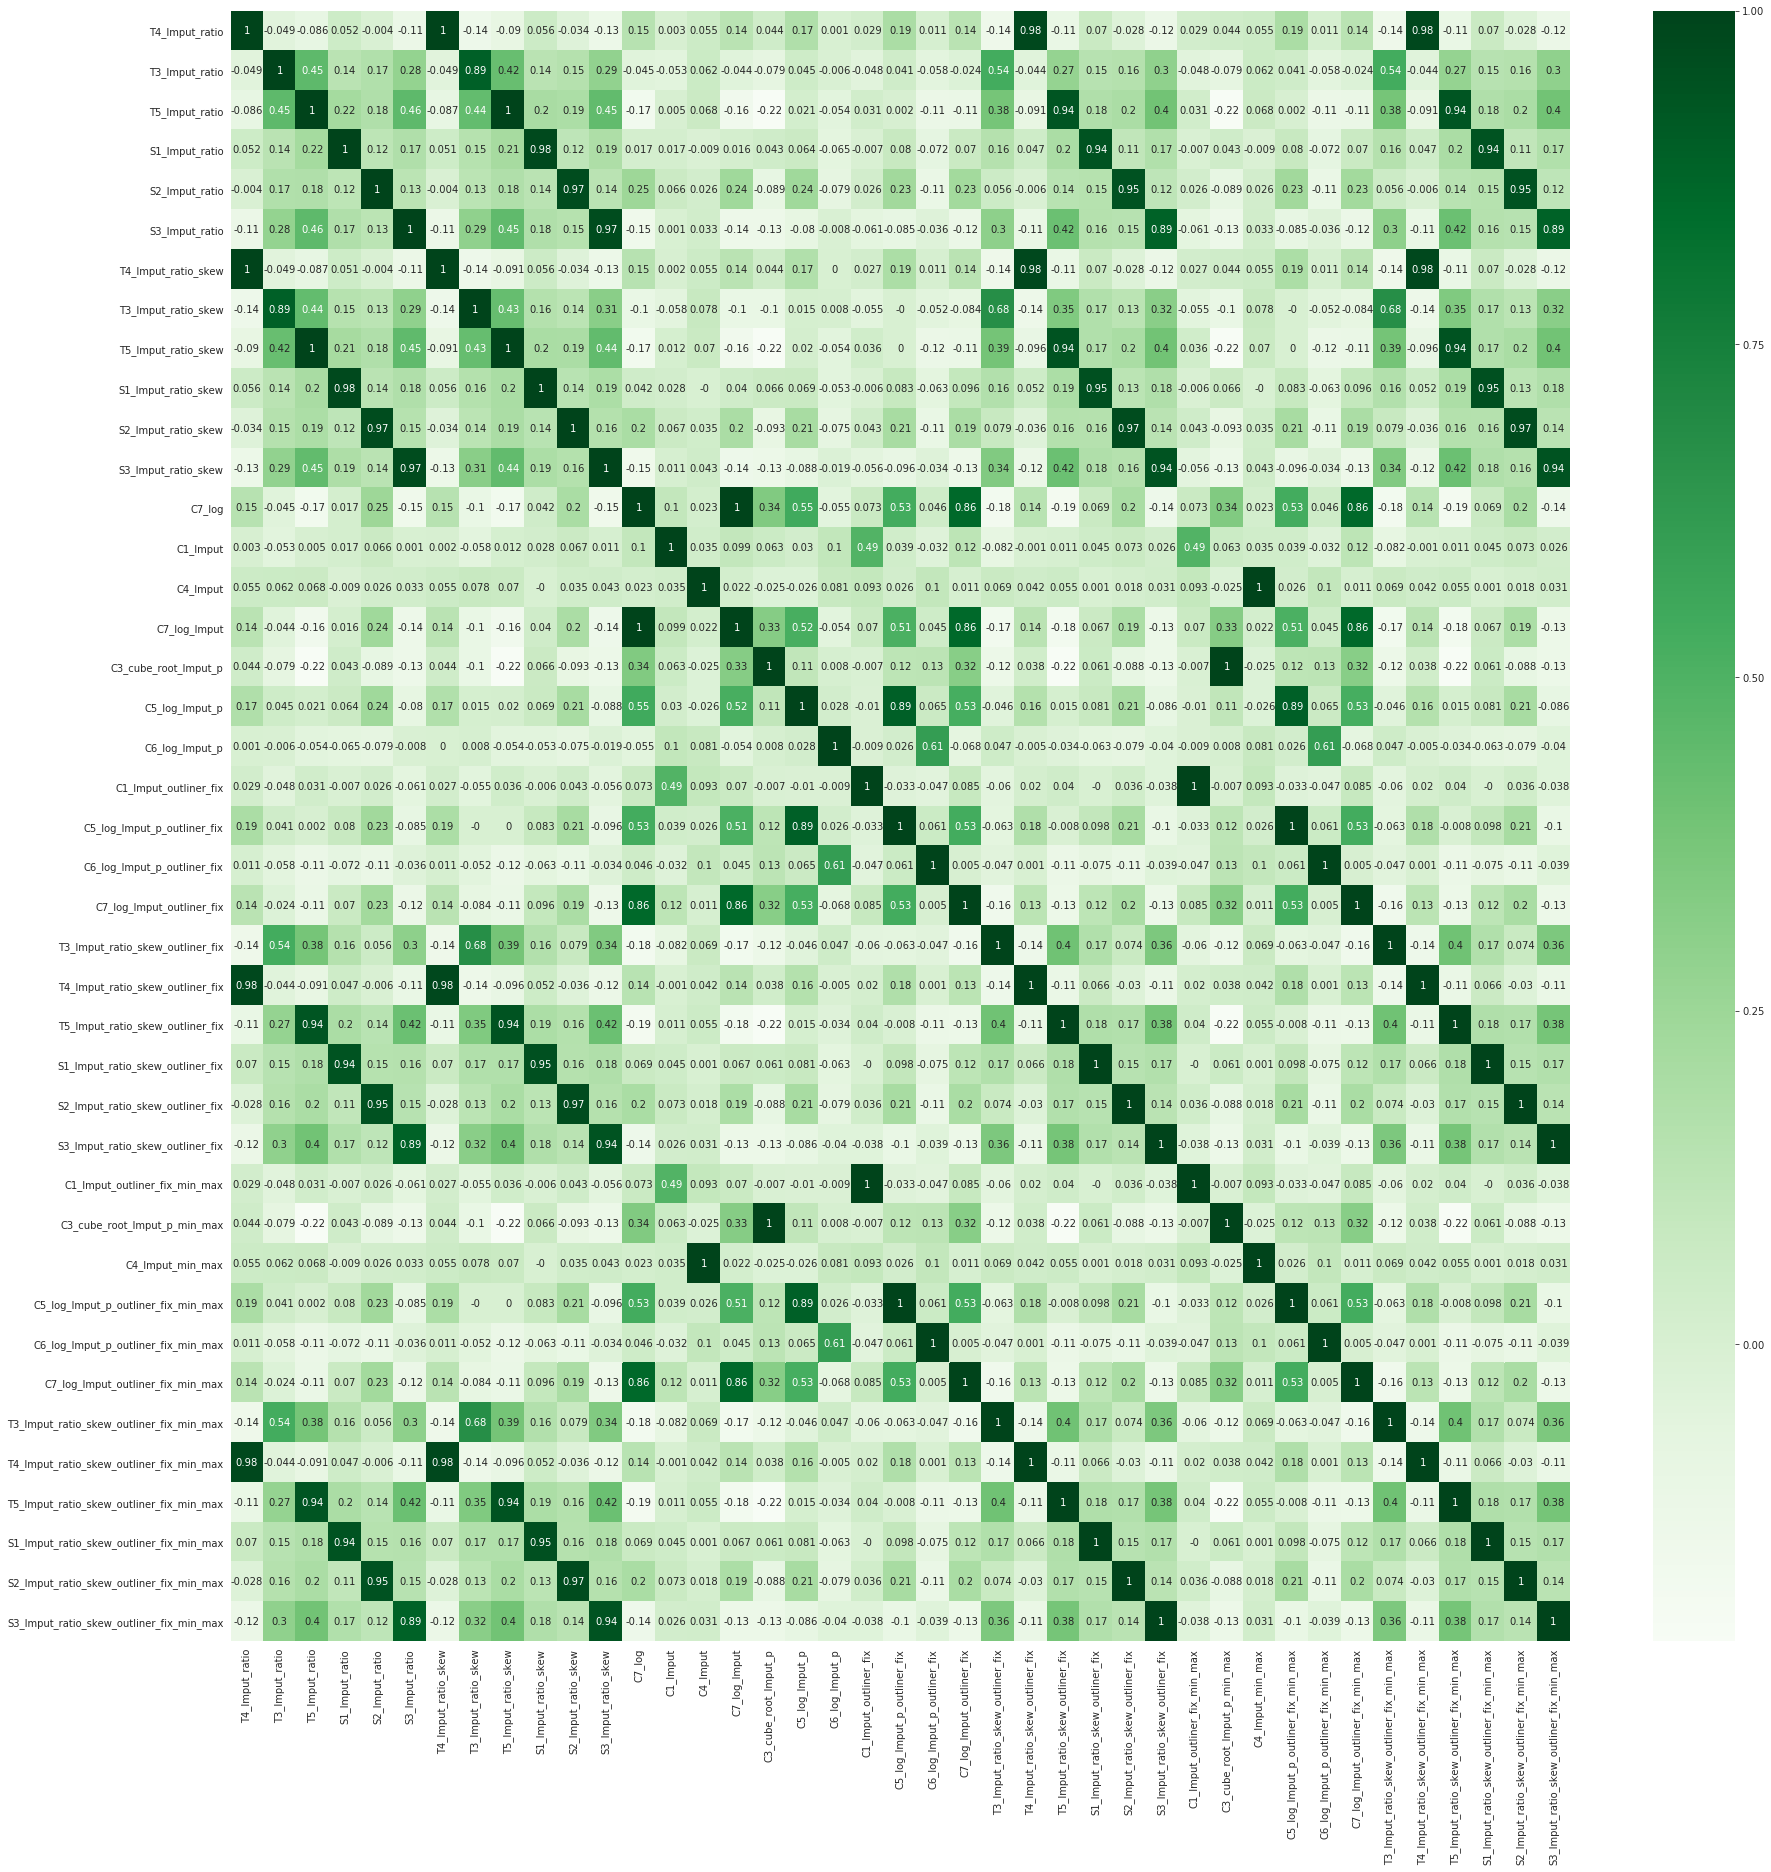

In [53]:
# heatmap detailing relationships between min-max features
plt.figure(figsize= (30,30))
corr = data_min_max_filtered.corr().round(3)
sns.heatmap(corr, annot=True,cmap=plt.cm.Greens)
plt.show()

## Selected Features

Ultimately, after running both our MM and ZS pipelines through many different combinations of features and utilizing several different feature selection models. While our first attempt focused on RFE, trial-and-error by hand resulted in a better score. Ultimately, it was decided that the columns that would be selected for 
```python
Y1_cols =  [
'S1_Imput_ratio_skew_outliner_fix_min_max',
'C2_Imput',
'T3_Imput_ratio_skew_outliner_fix_min_max',
'T4_Imput_ratio_skew_outliner_fix_min_max',
'T5_Imput_ratio_skew_outliner_fix_min_max',
'S2_Imput_ratio_skew_outliner_fix_min_max'
]
``` 

After running the evaluation code, Y1 resulted in a promising score of
**F1 0.6754, AUC 0.6930**.

we attempted to use similar methods for Y2, although a tutorial [using SPSA](https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-2-feature-selection-and-ranking/#Feature-Selection-Using-SPSA) was found to be the most effective in getting a baseline (f1 socre 64) of the columns that we should include in our feature selection. After running the evaluation through 100 iterations, our feature selection concluded that the best variables included
```python
Y2_cols =[
'S3_Imput_ratio_skew_outliner_fix_min_max',
'T4_Imput_ratio_skew_outliner_fix_min_max',
'C6_log_Imput_p_outliner_fix_min_max', 
'C2_Imput',
'S2_Imput_ratio_skew_outliner_fix_min_max', 
'C5_log_Imput_p_outliner_fix_min_max'
]
``` 

For Y2, the evaluation code returned a score of **F1 0.6739 , AUC 0.6906**.

In [ ]:
data.to_csv ('TeamFAE_final.csv')

# Evaluation Y1

In [54]:
y1 = data.Y1


cols_y1 = [
'S1_Imput_ratio_skew_outliner_fix_min_max',
'C2_Imput',
'T3_Imput_ratio_skew_outliner_fix_min_max',
'T4_Imput_ratio_skew_outliner_fix_min_max',
'T5_Imput_ratio_skew_outliner_fix_min_max',
'S2_Imput_ratio_skew_outliner_fix_min_max'
]

predictors_y1 = data[cols_y1[:]]

# lists for f1-score and AUC
f1_score_lst = []
auc_lst = []


#loop to calculate f1 and auc scores and present averages after 10 runs
for count in range (1,100):
    #Model building
    clf = LogisticRegression()
    X1_train, X1_test, y1_train, y1_test = train_test_split(predictors_y1, y1, test_size=0.2, random_state=123)
    clf.fit(X1_train, y1_train)

    y1_pred = clf.predict(X1_test)

    
    #10-fold cross validation
    kfold = model_selection.KFold(n_splits=10, random_state=123, shuffle=True)
    scoring = 'accuracy'
    results = model_selection.cross_val_score(clf, X1_train, y1_train, cv=kfold, scoring=scoring)

    

    
    #calculate f1-score and AUC
    
    clf_roc_auc = roc_auc_score(y1_test, y1_pred)
    f1_score_lst.append(precision_recall_fscore_support(y1_test, y1_pred, average='weighted')[2])
    auc_lst.append(clf_roc_auc)
    


print('F1 {:.4f}; AUC {:.4f} '.format(np.mean(f1_score_lst),np.mean(auc_lst)))

#result=logit_model.fit()
confusion_matrix_y1 = confusion_matrix(y1_test, y1_pred)


#print(result.summary())
print('Accuracy of classifier on test set: {:.2f}'.format(clf.score(X1_test, y1_test)))

print("10-fold cross validation average accuracy of classifier: %.3f" % (results.mean()))

print('Confusion Matrix for Logistic Regression Classfier:')
print(confusion_matrix_y1)

print('Classification Report for Logistic Regression Classfier:')
print(classification_report(y1_test, y1_pred))

F1 0.6754; AUC 0.6930 
Accuracy of classifier on test set: 0.67
10-fold cross validation average accuracy of classifier: 0.579
Confusion Matrix for Logistic Regression Classfier:
[[46 32]
 [11 43]]
Classification Report for Logistic Regression Classfier:
              precision    recall  f1-score   support

           0       0.81      0.59      0.68        78
           1       0.57      0.80      0.67        54

    accuracy                           0.67       132
   macro avg       0.69      0.69      0.67       132
weighted avg       0.71      0.67      0.68       132



# Evaluation Y2

In [55]:
#https://github.com/vaksakalli/spsaml_py
#https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-2-feature-selection-and-ranking/

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from SpFtSel import SpFtSel


usecols = [ 'C3_cube_root_Imput_p_min_max', 'Y1','Y2', 
'C1_Imput_outliner_fix_min_max',
'C2_Imput',
'C4_Imput_min_max',
'C5_log_Imput_p_outliner_fix_min_max',
'C6_log_Imput_p_outliner_fix_min_max',
'C7_log_Imput_outliner_fix_min_max',
'div_manufacturing','div_other','div_services',
'T3_Imput_ratio_skew_outliner_fix_min_max',
'T4_Imput_ratio_skew_outliner_fix_min_max',
'T5_Imput_ratio_skew_outliner_fix_min_max',
'S1_Imput_ratio_skew_outliner_fix_min_max',
'S2_Imput_ratio_skew_outliner_fix_min_max',
 'S3_Imput_ratio_skew_outliner_fix_min_max']
df = data[usecols]


X = df.drop(["Y1" ,"Y2"  ],1)   #Feature Matrix
y = df["Y2"].values          #Target Variable
len(X.columns)
# make sure the results are repeatable
np.random.seed(8)


x =X.values
#y = df.data, df.target

# specify a wrapper to use
wrapper = DecisionTreeClassifier()

# specify a metric to maximize
# (by default, sklearn metrics are defined as "higher is better")
# you need to make sure your scoring metric is consistent with your problem type,
# based on whether it is a binary or multi-class classification problem
# example: accuracy, f1, roc_auc, etc.
# more info on the scoring metrics can be found here:
# https://scikit-learn.org/stable/modules/model_evaluation.html
scoring = 'f1_weighted'

# set the engine parameters
sp_engine = SpFtSel(x, y, wrapper, scoring)

# run the engine
# available engine parameters:
# 1. num_features: how many features to select
#    (in addition to features to keep, if any)
#    default value is 0 and it results in automatic feature selection
# 2. run_mode: 'regular' (default) or 'extended'
# 3. stratified_cv: whether CV should be stratified or not (default is True)
#    stratified_cv must be set to False for regression problems
# 4. n_jobs: number of cores to be used in cross-validation (default is 1)
# 5. print_freq: print frequency for the output (default is 5)
# 6. features_to_keep_indices: indices of features to keep: default is None
sp_run = sp_engine.run(num_features=0)# ,stratified_cv = False)

# get the results of the run
sp_results = sp_run.results

# list of available keys in the engine output
print('Available keys:\n', sp_results.keys())

# performance value of the best feature set
print('Best value:', sp_results.get('best_value'))

# indices of selected features
print('Indices of selected features: ', sp_results.get('features'))

# importance of selected features
print('Importance of selected features: ', sp_results.get('importance').round(3))

# number of iterations for the optimal set
print('Total iterations for the optimal feature set:', sp_results.get('total_iter_for_opt'))
fs_indices_spsa = sp_results.get('features')

best_features_spsa = X.columns[fs_indices_spsa].values
best_features_spsa

/opt/tljh/user/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
spFtSel-INFO: Algorithm run mode: regular
spFtSel-INFO: Wrapper: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
spFtSel-INFO: Scoring metric: f1_weighted
spFtSel-INFO: Number

Available keys:
 dict_keys(['_wrapper', '_scoring', 'selected_data', 'iter_results', 'features', 'importance', 'num_features', 'total_iter_overall', 'total_iter_for_opt', 'best_value', 'best_std'])
Best value: 0.641
Indices of selected features:  [ 5  0 14 12  3  2  1 13  6 11  4]
Importance of selected features:  [0.514 0.506 0.506 0.505 0.503 0.503 0.503 0.503 0.503 0.501 0.501]
Total iterations for the optimal feature set: 2


array(['C6_log_Imput_p_outliner_fix_min_max',
       'C3_cube_root_Imput_p_min_max',
       'S2_Imput_ratio_skew_outliner_fix_min_max',
       'T5_Imput_ratio_skew_outliner_fix_min_max', 'C4_Imput_min_max',
       'C2_Imput', 'C1_Imput_outliner_fix_min_max',
       'S1_Imput_ratio_skew_outliner_fix_min_max',
       'C7_log_Imput_outliner_fix_min_max',
       'T4_Imput_ratio_skew_outliner_fix_min_max',
       'C5_log_Imput_p_outliner_fix_min_max'], dtype=object)

In [57]:
y2 = data.Y2

# lists for f1-score and AUC
cols_y2 = [
'S3_Imput_ratio_skew_outliner_fix_min_max',
'T4_Imput_ratio_skew_outliner_fix_min_max',
'C6_log_Imput_p_outliner_fix_min_max', 
'C2_Imput',
'S2_Imput_ratio_skew_outliner_fix_min_max', 
'C5_log_Imput_p_outliner_fix_min_max'
]
predictors_y2 = data[cols_y2[:]]
f1_score_lst = []
auc_lst = []


#loop to calculate f1 and auc scores and present averages after 10 runs
for count in range (1,300):
    #Model building
    clf1 = LogisticRegression()

    
    
    # Splitting data into testing and training
    X2_train, X2_test, y2_train, y2_test = train_test_split(predictors_y2, y2, test_size=0.2, random_state=123)
    
    # Begin oversampling
    oversample = pd.concat([X2_train,y2_train],axis=1)
    max_size = oversample['Y2'].value_counts().max()
    lst = [oversample]
    for class_index, group in oversample.groupby('Y2'):
        lst.append(group.sample(max_size-len(group), replace=True))
    X2_train = pd.concat(lst)
    y2_train=pd.DataFrame.copy(X2_train['Y2'])
    del X2_train['Y2']
    
    # fitting model on oversampled data
    clf1.fit(X2_train, y2_train)
    
    y2_pred = clf1.predict(X2_test)
    
    
    #10-fold cross validation
    kfold = model_selection.KFold(n_splits=10, random_state=123, shuffle=True)
    scoring = 'accuracy'
    results = model_selection.cross_val_score(clf1, X2_train, y2_train, cv=kfold, scoring=scoring)
    
    #calculate f1-score and AUC
    
    clf1_roc_auc = roc_auc_score(y2_test, y2_pred)
    
    
    #calculate average f1-score and AUC
    f1_score_lst.append(precision_recall_fscore_support(y2_test, y2_pred, average='weighted')[2])
    auc_lst.append(clf1_roc_auc)
    
    
print('F1 {:.4f}; AUC {:.4f} '.format(np.mean(f1_score_lst),np.mean(auc_lst)))

confusion_matrix_y2 = confusion_matrix(y2_test, y2_pred)


print('Accuracy of classifier on test set: {:.3f}'.format(clf1.score(X2_test, y2_test)))

print("10-fold cross validation average accuracy of clf1: %.3f" % (results.mean()))

print('Confusion Matrix for Classfier:')
print(confusion_matrix_y2)

print('Classification Report for Classfier:')
print(classification_report(y2_test, y2_pred))

F1 0.6739; AUC 0.6906 
Accuracy of classifier on test set: 0.682
10-fold cross validation average accuracy of clf1: 0.630
Confusion Matrix for Classfier:
[[28  8]
 [34 62]]
Classification Report for Classfier:
              precision    recall  f1-score   support

           0       0.45      0.78      0.57        36
           1       0.89      0.65      0.75        96

    accuracy                           0.68       132
   macro avg       0.67      0.71      0.66       132
weighted avg       0.77      0.68      0.70       132

